In [1]:
import pickle
import numpy as np

# Define the path to your pickle file
file_path = 'processed_data/LGMR_data.pkl'

# Read the pickle file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Extract the LGMR_age and LGMR_medians from the loaded data
LGMR_age = data['LGRM_age']
LGMR_medians = data['LGMR_medians']

# Find the index where LGMR_age is greater than or equal to 21000
indices = np.where(LGMR_age >= 17000)[0]
# find the index where LGMR_age is between 17000 and 21000
# indices = np.where((LGMR_age >= 17000) & (LGMR_age <= 21000))[0]

# Crop the LGMR_age and medians using the found indices
cropped_age = LGMR_age[indices]
cropped_medians = {key: value[indices] for key, value in LGMR_medians.items()}

# print the shape of the cropped data
print('Cropped age shape:', cropped_age.shape)
print('Cropped medians shape:', {key: value.shape for key, value in cropped_medians.items()})


Cropped age shape: (35,)
Cropped medians shape: {'class_0_medians': (35,), 'class_1_medians': (35,), 'class_2_medians': (35,), 'class_3_medians': (35,)}


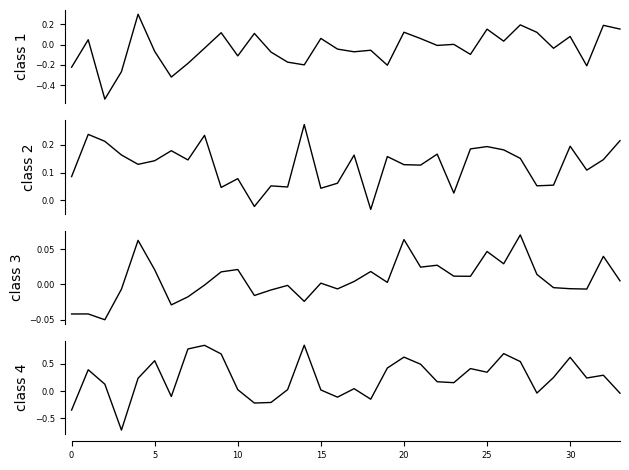

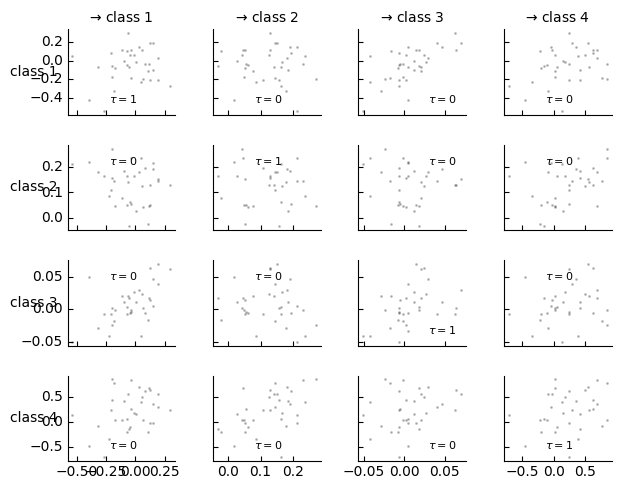


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable class 1 has 3 link(s):
    [pc_alpha = 0.4]
        (class 3 -1): max_pval = 0.12648, |min_val| =  0.306
        (class 4 -3): max_pval = 0.23832, |min_val| =  0.240
        (class 2 -1): max_pval = 0.30665, |min_val| =  0.204

    Variable class 2 has 1 link(s):
    [pc_alpha = 0.1]
        (class 4 -2): max_pval = 0.09419, |min_val| =  0.322

    Variable class 3 has 1 link(s):
    [pc_alpha = 0.05]
        (class 4 -1): max_pval = 0.04958, |min_val| =  0.375

    Variable class 4 has 4 link(s):
    [pc_alpha = 0.4]
        (class 1 -1): max_pval = 0.06674, |min_val| =  0.351
        (class 1 -2): max_pval = 0.25527, |min_val| =  0.231
        (class 4 -1): max_pval = 0.24594, |min_val| =  0.227
        (class 3 -3):

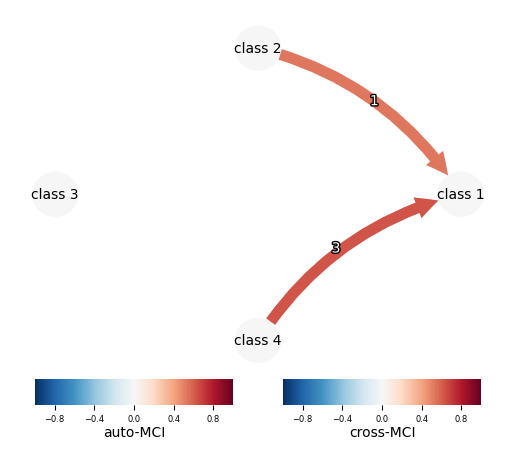

In [35]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
# from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI


data = np.array([cropped_medians['class_0_medians'],
                 cropped_medians['class_1_medians'],
                 cropped_medians['class_2_medians'],
                 cropped_medians['class_3_medians']]).T

# different each median
data = np.diff(data, axis=0)

var_names = ['class 1', 'class 2', 'class 3', 'class 4']

# Create a DataFrame object
dataframe = pp.DataFrame(data, 
                         datatime={0: np.arange(len(data))}, 
                         var_names=var_names)



tp.plot_timeseries(dataframe); plt.show()

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
# correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
# lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
#                                     'x_base':5, 'y_base':.5}); plt.show()



pcmci.verbosity = 1
tau_min=1
tau_max=3
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.05)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    )
plt.show()




# for data younger than 17 kyr

In [3]:
import pickle
import numpy as np

# Define the path to your pickle file
file_path = 'processed_data/LGMR_data.pkl'

# Read the pickle file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Extract the LGMR_age and LGMR_medians from the loaded data
LGMR_age = data['LGRM_age']
LGMR_medians = data['LGMR_medians']

# Find the index where LGMR_age is greater than or equal to 21000
indices = np.where(LGMR_age <= 17000)[0]
# find the index where LGMR_age is between 17000 and 21000
# indices = np.where((LGMR_age >= 17000) & (LGMR_age <= 21000))[0]

# Crop the LGMR_age and medians using the found indices
cropped_age = LGMR_age[indices]
cropped_medians = {key: value[indices] for key, value in LGMR_medians.items()}

# print the shape of the cropped data
print('Cropped age shape:', cropped_age.shape)
print('Cropped medians shape:', {key: value.shape for key, value in cropped_medians.items()})


Cropped age shape: (85,)
Cropped medians shape: {'class_0_medians': (85,), 'class_1_medians': (85,), 'class_2_medians': (85,), 'class_3_medians': (85,)}


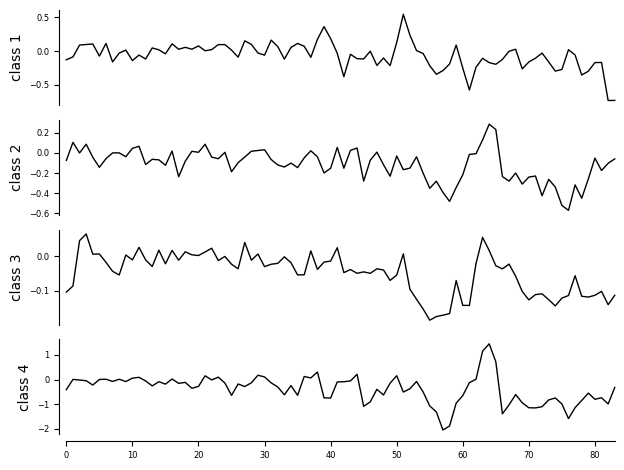

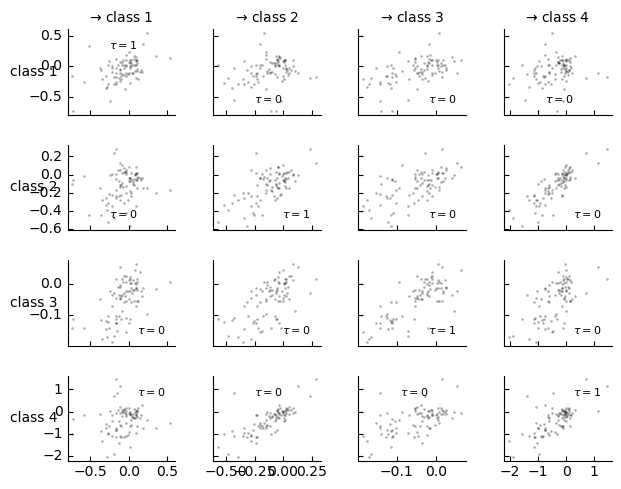


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable class 1 has 3 link(s):
    [pc_alpha = 0.2]
        (class 1 -1): max_pval = 0.00002, |min_val| =  0.467
        (class 3 -3): max_pval = 0.07578, |min_val| =  0.205
        (class 1 -2): max_pval = 0.18710, |min_val| =  0.152

    Variable class 2 has 5 link(s):
    [pc_alpha = 0.5]
        (class 2 -1): max_pval = 0.09856, |min_val| =  0.192
        (class 3 -1): max_pval = 0.25999, |min_val| =  0.132
        (class 4 -1): max_pval = 0.28494, |min_val| =  0.126
        (class 3 -2): max_pval = 0.29445, |min_val| =  0.122
        (class 3 -3): max_pval = 0.48143, |min_val| =  0.081

    Variable class 3 has 4 link(s):
    [pc_alpha = 0.5]
        (class 3 -1): max_pval = 0.00000, |min_val| =  0.569
        (class 1 -1

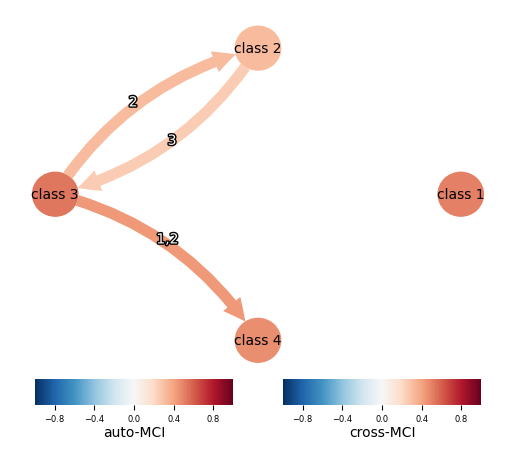

In [4]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
# from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI


data = np.array([cropped_medians['class_0_medians'],
                 cropped_medians['class_1_medians'],
                 cropped_medians['class_2_medians'],
                 cropped_medians['class_3_medians']]).T

# different each median
data = np.diff(data, axis=0)

var_names = ['class 1', 'class 2', 'class 3', 'class 4']

# Create a DataFrame object
dataframe = pp.DataFrame(data, 
                         datatime={0: np.arange(len(data))}, 
                         var_names=var_names)



tp.plot_timeseries(dataframe); plt.show()

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
# correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
# lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
#                                     'x_base':5, 'y_base':.5}); plt.show()



pcmci.verbosity = 1
tau_min=1
tau_max=3
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.05)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    )
plt.show()




# Regime PCMCI

In [5]:
import pickle
import numpy as np

# Define the path to your pickle file
file_path = 'processed_data/LGMR_data.pkl'

# Read the pickle file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Extract the LGMR_age and LGMR_medians from the loaded data
LGMR_age = data['LGRM_age']
LGMR_medians = data['LGMR_medians']


cropped_age = LGMR_age
cropped_medians = LGMR_medians

# print the shape of the cropped data
print('Cropped age shape:', cropped_age.shape)
print('Cropped medians shape:', {key: value.shape for key, value in cropped_medians.items()})


Cropped age shape: (120,)
Cropped medians shape: {'class_0_medians': (120,), 'class_1_medians': (120,), 'class_2_medians': (120,), 'class_3_medians': (120,)}


In [9]:

# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn
from sklearn.linear_model import LinearRegression

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.rpcmci import RPCMCI


from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb



data = np.array([cropped_medians['class_0_medians'],
                 cropped_medians['class_1_medians'],
                 cropped_medians['class_2_medians'],
                 cropped_medians['class_3_medians']]).T

# different each median
data = np.diff(data, axis=0)

var_names = ['class 1', 'class 2', 'class 3', 'class 4']

# Create a DataFrame object
dataframe = pp.DataFrame(data, 
                         datatime={0: np.arange(len(data))}, 
                         var_names=var_names)


# Init RPCMCI with the dataframe, a conditional independence test for use in PCMCI, 
# and a prediction_model which is used to predict each variable given its learned parents. This prediction 
# is then used inside the regime learning optimization step.
rpcmci = RPCMCI(dataframe=dataframe, 
                cond_ind_test=ParCorr(),
                prediction_model=LinearRegression(),
                verbosity=1)

# RPCMCI parameters, see paper
num_regimes = 2
max_transitions = 2
switch_thres = 0.05
num_iterations = 20
# max_anneal = 10
max_anneal = 30
tau_min = 1
tau_max = 3
pc_alpha = 0.05
alpha_level = 0.05
n_jobs = -1     # uses joblib for parallelization, here all available cpus are used

# Run RPCMCI
results = rpcmci.run_rpcmci(
    num_regimes=num_regimes, max_transitions=max_transitions, 
    switch_thres=switch_thres, 
    num_iterations=num_iterations, max_anneal=max_anneal, 

    tau_min=tau_min, tau_max=tau_max,
    pc_alpha=pc_alpha, alpha_level=alpha_level, 
    n_jobs=n_jobs
    )

if results is None:
    print("All annealings resulted in errors. Increase annealing and tune other parameters!")
else:
    print("Done!")

ModuleNotFoundError: No module named 'ortools'

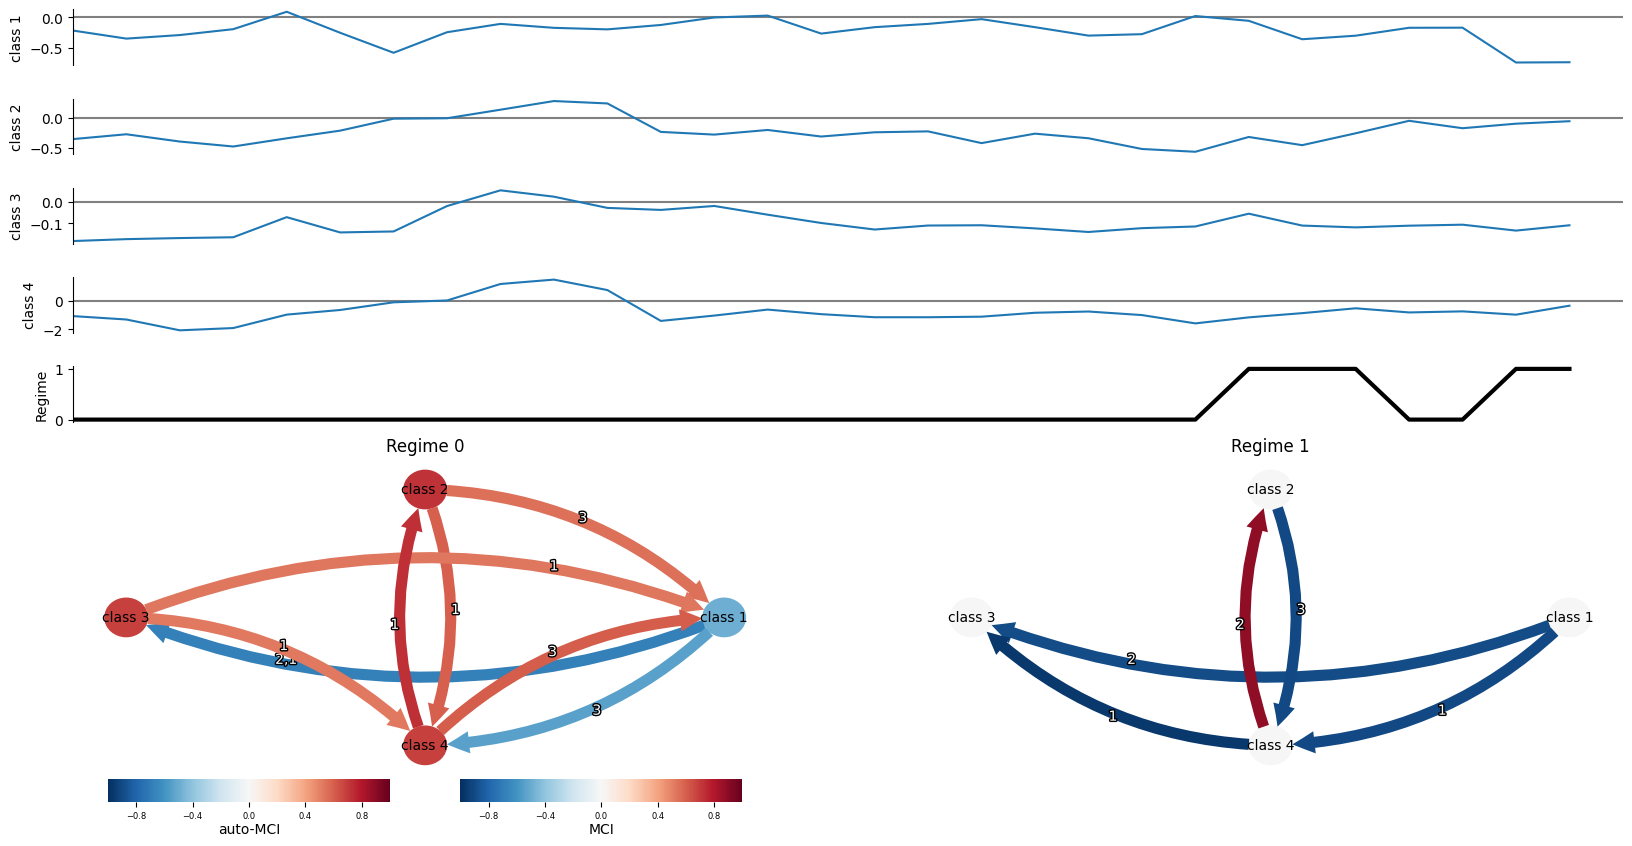

In [47]:
# data=data_array
T, N = data.shape
datatime = np.arange(T)


regimes = results['regimes'].argmax(axis=0)
n_regimes = len(results['causal_results'])

# Create nice Mosaic plot
mosaic = [['data %s' %j for i in range(n_regimes)] for j in range(N+1)]
for n in range(N):
    mosaic.append(['graph %s' %i for i in range(n_regimes)])

fig, axs = plt.subplot_mosaic(mosaic = mosaic, figsize=(20, 10))

for j in range(N):
    ax = axs['data %s' %j]
    ax.axhline(0., color='grey')
    ax.plot(datatime, data[:,j])
    for loc, spine in ax.spines.items():
        if loc != 'left':
            spine.set_color("none")
    
    ax.xaxis.set_ticks([])   
    ax.set_xlim(0., T)
    ax.set_ylabel(var_names[j])
    
# Regime variable
ax = axs['data %s' %N]
ax.plot(datatime, regimes.astype('int'), lw=3, color='black')
for loc, spine in ax.spines.items():
    if loc != 'left':
        spine.set_color("none")
ax.xaxis.set_ticks([]) 
ax.yaxis.set_ticks(range(n_regimes))   
ax.set_xlim(0., T)
ax.set_ylabel("Regime")
    
# Causal graphs for each regime
for w in range(n_regimes):
    if w == 0: show_colorbar=True
    else: show_colorbar = False
    tp.plot_graph(graph=results['causal_results'][w]['graph'], 
                  val_matrix=results['causal_results'][w]['val_matrix'], 
                  show_colorbar=show_colorbar,
                  var_names=var_names,
                  fig_ax=(fig, axs['graph %s' %w]))
    axs['graph %s' %w].set_title("Regime %d" %w, pad=-4)

fig.subplots_adjust(hspace=0.6)
plt.show()